### Criar o circuito

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

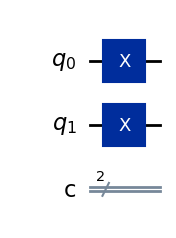

In [3]:
Qr = QuantumRegister(2,'q') #Registrar 2 qubits 
Cr = ClassicalRegister(2,'c') #Registrar 2 bits clássico

circuit = QuantumCircuit(Qr,Cr) # Criação do circuito

circuit.x(Qr[0]) #Operando um qubit em um porta x
circuit.x(Qr[1]) #Operando um qubit em um porta x

circuit.draw(output='mpl')

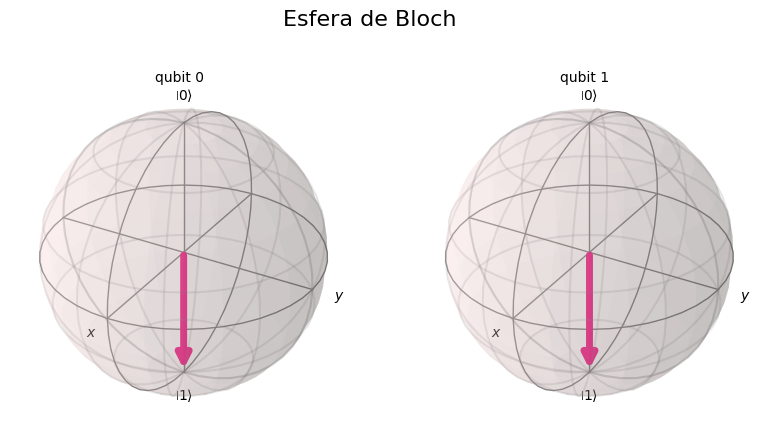

In [4]:
from qiskit.quantum_info import DensityMatrix

matrix = DensityMatrix(circuit)
plot_bloch_multivector(matrix, title='Esfera de Bloch', reverse_bits=False)

$|q_0>\otimes|q_1>$ = $|1>\otimes|1>$

CNOT $|q_0>\otimes|q_1>$ = $|1>\otimes|0>$

onde $CNOT = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

### Utilizar a porta CNOT
- Coloca o qubit em emaranhamento 

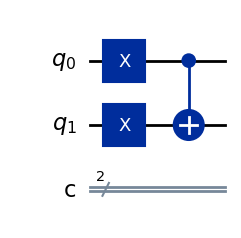

In [5]:
circuit.cx(Qr[0],Qr[1]) #Emaranhar os qubits
circuit.draw(output = 'mpl')

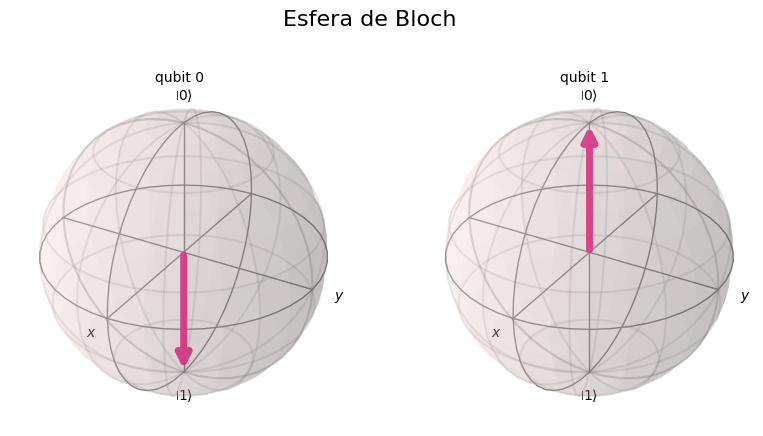

In [6]:
from qiskit.quantum_info import DensityMatrix

matrix = DensityMatrix(circuit)
plot_bloch_multivector(matrix, title='Esfera de Bloch', reverse_bits=False)

### Realização das medidas 


In [7]:
circuit.measure(Qr,Cr)

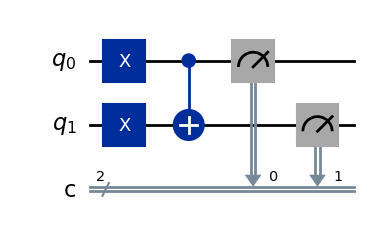

In [8]:
circuit.draw(output='mpl')

### Simulação no CD

In [9]:
from qiskit_aer import * #IMPORTANTE: instalar qiskit_aer
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import numpy as np

In [10]:
simulador = Aer.get_backend('statevector_simulator') #Selecionar o simulador no CD

pm = generate_preset_pass_manager(optimization_level=0,backend=simulador)

transpile = pm.run(circuit)

counts = simulador.run(transpile,shots=1024).result().get_counts()


In [11]:
from qiskit.visualization import plot_histogram

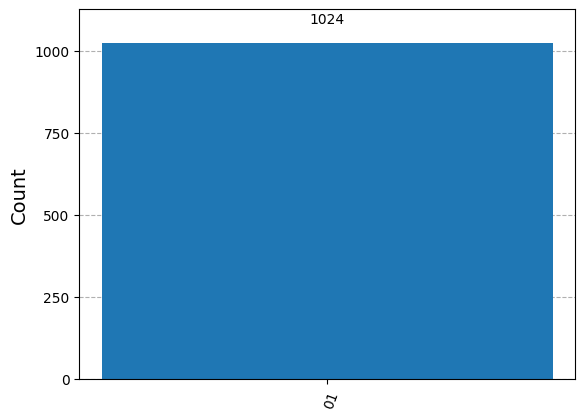

In [12]:
plot_histogram(counts)